In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('FRAMe/demo Untargeted_HILIC_UPLC addl info test.csv')

In [3]:
#Features where mean area in BLANKS contributes GREATER THAN X% of mean area in QC will be removed.
# DEFAULT 5
# Set to 100000 to effectively turn off.
ThresholdBlankContribution = 5
#Features where QC RSD is GREATER THAN X will be removed.
# DEFAULT 20
# Set to 100000 to effectively turn off.
ThresholdQCrsd = 20
#Features with detection frequency in QC samples LESSER THAN X% will be removed.
# DEFAULT 60
# Set to -1 to effectively turn off.
ThresholdQCCountFrequency = 60
#Features with detection frequency in SAMPLES LESSER THAN X% will be removed.
# DEFAULT 80
# Set to -1 to effectively turn off.
ThresholdSAMPLECountFrequency = 80
#Features in SAMPLEs with RSD ratios LESSER THAN X% of QC samples will be removed.
# DEFAULT 120
# Set to -1 to effectively turn off.
ThresholdRSDratios = 120
#Features in SAMPLES with median area values LESSER THAN these two LOQ multipliers will be removed.
# DEFAULT LO 10
# DEFAULT HI 50
# Set to 0 to effectively turn off.
LOQlo = 10
LOQhi = 50
#The first n QC samples will be removed for batch stability.
LeadingQCSamples = 3
#The name, if any, of a class set to combine as SAMPLES.
combine_classes_on_text = "Class"
#The text for a missing value indicator (software dependent).
missing_indicator = np.nan
#Informational columns ancillary to the features (e.g. m/z, RT, etc.) listed by column number
# This can be any combination of column numbers:
# set infoColumns <- NULL to ignore
# set infoColumns <- c(2:5) to flag columns 2, 3, 4, and 5 as informational columns
# set infoColumns <- c(2,4,6) to flag columns 2, 4, and 6 as informationnl columns
infoColumns = ['Info','Info.1']

In [4]:
feature_info = df[infoColumns]

In [225]:
import FRAMey
reload(FRAMey)

<module 'FRAMey' from 'FRAMey/__init__.pyc'>

In [229]:
metab_f = (
    df.drop(infoColumns, axis=1)
    .pipe(FRAMey._parse_input_flat)
    .pipe(FRAMey._drop_leading_QC, 3)
)

f = FRAMey.FRAMe(metab_f)

In [7]:
f = FRAMey.FRAMe.from_input_csv('./FRAMe/demo Untargeted_HILIC_UPLC addl info test.csv', info_columns=infoColumns)

In [292]:
class tmp(object):
    def __init__(self, thresh):
        self._cache = {}
        self.thresh = thresh
        
    @property
    def thresh(self):
        return self._thresh
    
    @thresh.setter
    @FRAMey.cached_clear()
    def thresh(self, value):
        self._thresh = value
    
    

In [294]:
a = tmp({'a':1,'b':2})

In [296]:
a._cache['a'] = 0

In [297]:
a._cache

{'a': 0}

In [301]:
a.thresh['b'] = 3

In [302]:
a.thresh

{'a': 1, 'b': 3}

In [303]:
a._cache

{'a': 0}

In [304]:
a.thresh = {'a':-1,'b':-2}

In [305]:
a._cache

{}

In [8]:
f.summary_class_feature.dropna().query('Feature in [1000, 1003]')

mean      median           std        rsd
Class   Feature                                                   
Blank   1000     1.345439e+07  13454393.0  5.560094e+05   4.132549
        1003     4.735801e+06   4735801.0  2.760157e+06  58.282799
Class 1 1000     1.314206e+07  13098822.0  4.812065e+06  36.615765
        1003     4.370998e+06   3266569.5  2.049823e+06  46.895980
Class 2 1000     1.163270e+07  10290140.5  3.858743e+06  33.171520
        1003     3.393863e+06   3200889.0  1.074540e+06  31.661271
Class 3 1000     1.755764e+07  18714306.5  5.753421e+06  32.768758
        1003     3.430482e+06   3690159.5  4.875031e+05  14.210921
Class 4 1000     1.377918e+07  14344565.0  3.185279e+06  23.116611
        1003     2.901464e+06   2485065.0  1.103777e+06  38.042062
QC      1000     8.365673e+06   8640202.5  8.187659e+05   9.787210
        1003     3.670849e+06   3550286.5  3.910364e+05  10.652479

In [238]:
f._remove_blank_contribution.head()

Class,Blank,QC,percent
Feature,,,
7,1362661.0,5.995866e+05,227.266744
8,1943053.5,2.042999e+06,95.107920
15,1696977.0,7.539130e+05,225.089234
16,2109665.0,4.918389e+05,428.934171
19,2188004.0,1.437095e+07,15.225190


In [239]:
f._remove_blank_contribution.shape

(1601, 3)

# QC/Bio RSD Ratio

In [240]:
f.summary_group_feature.dropna().head()

mean      median           std        rsd
Group Feature                                                 
Blank 7         1362661.0   1362661.0  5.603114e+04   4.111891
      8         1943053.5   1943053.5  7.376043e+04   3.796109
      15        1696977.0   1696977.0  3.354090e+04   1.976509
      16        2109665.0   2109665.0  2.409792e+05  11.422627
      20       37179861.0  37179861.0  2.894587e+06   7.785362

In [241]:
f._low_variability.head()

Group,QC,Sample,percent
Feature,,,
1,4.607108,165.743121,3597.552558
2,45.781614,33.058983,72.210174
3,4.201895,26.085562,620.804742
4,8.561428,52.899001,617.875880
5,27.689211,55.631855,200.915280


In [242]:
f._remove_low_variability.loc[10]

Group
QC         21.337540
Sample     17.566347
percent    82.326016
Name: 10, dtype: float64

In [243]:
f._remove_low_variability.shape

(373, 3)

# Sample Detection frequency

In [244]:
reload(FRAMey)
f = FRAMey.FRAMe(metab_f)

In [245]:
f._sample_count.head()

,count_mean,count_freq
Feature,,
1,0.416667,41.666667
2,0.666667,66.666667
3,1.000000,100.000000
4,0.958333,95.833333
5,0.958333,95.833333


In [246]:
f._remove_sample_count.head()

,count_mean,count_freq
Feature,,
1,0.416667,41.666667
2,0.666667,66.666667
25,0.750000,75.000000
31,0.708333,70.833333
38,0.333333,33.333333


# QC count freq

In [247]:
reload(FRAMey)
f = FRAMey.FRAMe(metab_f)

In [248]:
f._qc_count.head()

,count_mean,count_freq
Feature,,
1,1.000,100.0
2,0.875,87.5
3,1.000,100.0
4,1.000,100.0
5,1.000,100.0


In [249]:
f._qc_count.shape

(7383, 2)

In [250]:
f._remove_qc_count.head()

,count_mean,count_freq
Feature,,
138,0.500,50.0
158,0.250,25.0
168,0.250,25.0
191,0.000,0.0
228,0.375,37.5


In [251]:
f._remove_qc_count.shape

(400, 2)

# QC reproducibility

In [252]:
reload(FRAMey)
f = FRAMey.FRAMe(metab_f)

In [253]:
f._remove_qc_rsd.shape

(1592, 1)

In [254]:
f.summary_class_feature.dropna().head()

mean      median           std        rsd
Class Feature                                                 
Blank 7         1362661.0   1362661.0  5.603114e+04   4.111891
      8         1943053.5   1943053.5  7.376043e+04   3.796109
      15        1696977.0   1696977.0  3.354090e+04   1.976509
      16        2109665.0   2109665.0  2.409792e+05  11.422627
      20       37179861.0  37179861.0  2.894587e+06   7.785362

# Median filter

In [298]:
reload(FRAMey)
f = FRAMey.FRAMe(metab_f)

In [299]:
f._median_check.loc[[1000,1003]]

,Blank_mean,Blank_std,Sample_median,y,loq_low,loq_high,median_ratio
Feature,,,,,,,
1000,13454393.0,5.560094e+05,13710386.5,1.512242e+07,1.512242e+08,7.561211e+08,0.906626
1003,4735801.0,2.760157e+06,3222670.5,1.301627e+07,1.301627e+08,6.508137e+08,0.247588


In [300]:
f._remove_median_LOQ_low.shape

(1093, 7)

In [301]:
f._remove_median_LOQ_high.shape

(1220, 7)

# output

In [222]:
reload(FRAMey)

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list('mymap', ['tab:blue','tab:orange'], N=2)
f = FRAMey.FRAMe(metab_f,cmap=cmap)

In [180]:
t.query_frame(f._blank_contritribution).shape

(1601, 3)

In [140]:
f = FRAMey.FRAMe.from_input_csv('./FRAMe/demo Untargeted_HILIC_UPLC addl info test.csv', info_columns=infoColumns)

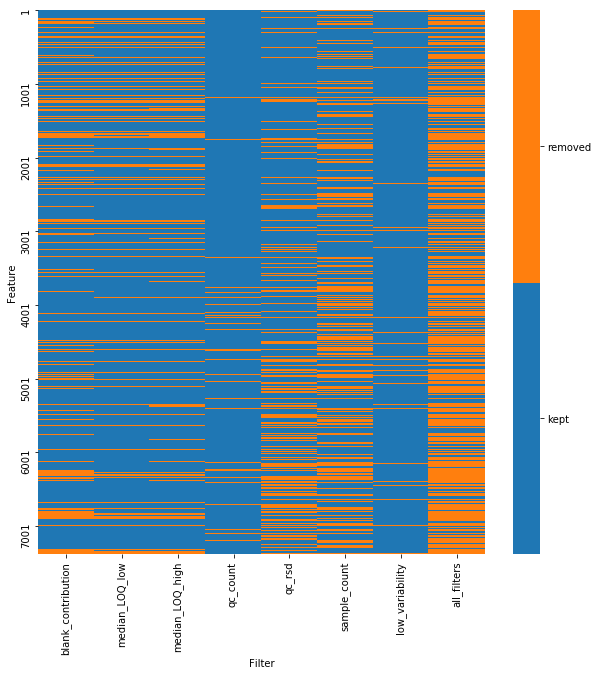

In [223]:
#f, a = plt.subplots(10,10)
f.map_removed()

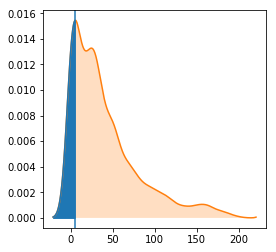

In [148]:
x = f._blank_contritribution.percent.dropna().values

fig, ax = plt.subplots(figsize=(4,4))
sns.kdeplot(x, shade=True, bw='silverman',clip=(0, 200), gridsize=1000, color=cmap(1),ax=ax)

b = f._thresholds['blank_contribution']
ax.axvline(x=b, color=cmap(0))

xx, yy = ax.lines[0].get_data()
msk = xx < b
plt.plot(xx[msk],yy[msk], color=cmap(0))
plt.fill_between(xx[msk],0,yy[msk], color=cmap(0))


(1955, 3)

In [74]:
from seaborn.distributions import _statsmodels_univariate_kde

In [76]:
sns.kdeplot


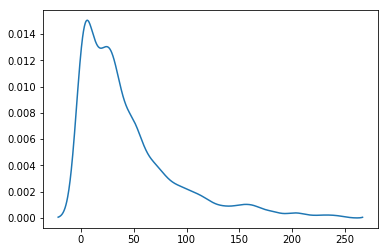

In [79]:
x = f._blank_contritribution.dropna().values
x = x[x<250]
xx, yy = _statsmodels_univariate_kde(x, kernel='gau', bw='silverman', gridsize=1000, cut=3, clip=(-np.inf, np.inf))

plt.plot(xx, yy)

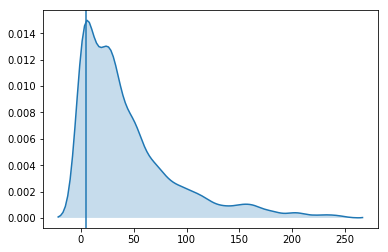

In [139]:
x = blank_contribution.percent.dropna().values
x = x[x < 250]

sns.kdeplot(x, shade=True, bw='silverman')#, kernel='gau', bw='silverman', gridsize=10000), #gridsize=10000)
#plt.xlim(0,250)
ax = plt.gca()

ax.axvline(x=ThresholdBlankContribution)

In [97]:
#QC count

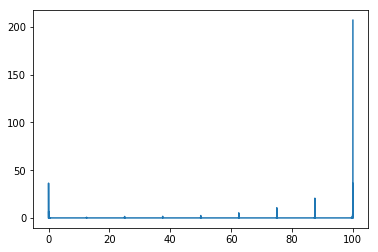

In [91]:
sns.kdeplot(QC_count.CountFreq.dropna().values, shade=True, kernel='gau', gridsize=10000)#kernel='gau', bw='silverman', gridsize=1000)

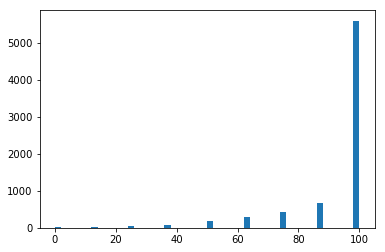

In [98]:
_ = plt.hist(QC_count.CountFreq.dropna().values, 50)

In [99]:
# QC rsd

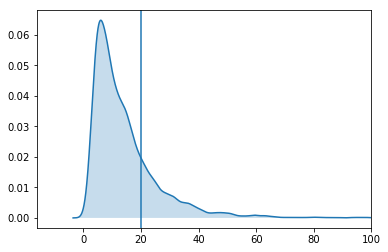

In [106]:
sns.kdeplot(QC_RSD.rsd.dropna().values, shade=True, kernel='gau', bw='silverman', gridsize=10000)
plt.xlim(None, 100)
plt.axvline(x=ThresholdQCrsd)

In [111]:
# Sample Count

(15.385916253915472, 100)

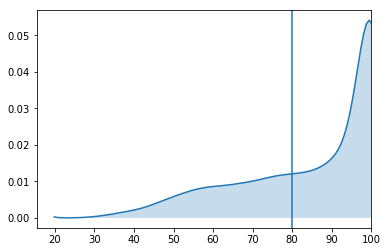

In [110]:
sns.kdeplot(sample_count.CountFreq.dropna().values, shade=True)
plt.axvline(x=ThresholdSAMPLECountFrequency)
plt.xlim(None, 100)

In [ ]:
# low variability

(0, 400)

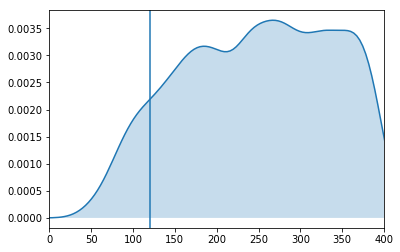

In [136]:
x = low_variability.percent.dropna().values
x = x[x < 400]
sns.kdeplot(x, shade=True, bw='silverman', kernel='gau', gridsize=100)
plt.axvline(ThresholdRSDratios)
plt.xlim(0, 400)